<a href="https://colab.research.google.com/github/wongwara/AT2_Classification/blob/main/MLAA_Lab_5_Exercise_1_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3: Multi-Class Classification**


## Exercise 1: Multi-class Classification with SVM

In this exercise, you will train a multi-class classifier using Support Vector Machine.

We are going to use a dataset from the UCI Machine Learning Repository which contains a dataset about car evaluation (https://archive.ics.uci.edu/ml/datasets/Car+Evaluation). This dataset contains the state of second hand cars and their categories: "**evaluation**" column.

You will have to import the dataset from the following link:
https://raw.githubusercontent.com/aso-uts/mlaa/main/datasets/lab5/ex1/car_evaluation.csv

The steps are:
1.   Load and explore dataset
2.   Data preparation
3.   Split data
4.   Scale data
5.   Assess baseline model
6.   Train SVC with default Hyperparameter
7.   Reduce SVC Overfitting with class weights
8.   Reduce SVC Overfitting with C Hyperparameter
9.   Reduce SVC Overfitting with C Hyperparameter
10.  Reduce SVC Overfitting with C Hyperparameter
11.  Assess model on Testing Set

## 1. Load and Explore Dataset

**[1.1]** Import the pandas and numpy packages

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
import pandas as pd
import numpy as np

**[1.2]** Create a variable called file_url containing the link to the CSV file and load the dataset into dataframe called df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
file_url = 'https://raw.githubusercontent.com/aso-uts/applied_ds/master/unit3/dataset/Car%20Evaluation.csv'
df = pd.read_csv(file_url)

In [ ]:
# Unit Tests
assert isinstance(file_url, str)
assert isinstance(df, pd.DataFrame)

**[1.3]** Display the first 5 rows of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.head()

,buying_price,maintenance_cost,doors,persons_capacity,luggage_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


**[1.4]** Display the dimensions (shape) of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.shape

(1728, 7)

**[1.5]** Display the summary (info) of df

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   buying_price      1728 non-null   object
 1   maintenance_cost  1728 non-null   object
 2   doors             1728 non-null   object
 3   persons_capacity  1728 non-null   object
 4   luggage_boot      1728 non-null   object
 5   safety            1728 non-null   object
 6   evaluation        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


**[1.6]** Display the descriptive statictics of df


In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df.describe()

,buying_price,maintenance_cost,doors,persons_capacity,luggage_boot,safety,evaluation
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


**[1.7]** Create a for loop that will iterate through each columns and print their list of unique values

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
for col in df.columns:
  print(col)
  print(df[col].unique())

buying_price
['vhigh' 'high' 'med' 'low']
maintenance_cost
['vhigh' 'high' 'med' 'low']
doors
['2' '3' '4' '5more']
persons_capacity
['2' '4' 'more']
luggage_boot
['small' 'med' 'big']
safety
['low' 'med' 'high']
evaluation
['unacc' 'acc' 'vgood' 'good']


## 2. Data Preparation

**[2.1]** Create a copy of df and save it into a variable called df_cleaned

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned = df.copy()

In [ ]:
# Unit Tests
assert isinstance(df_cleaned, pd.DataFrame)
assert df_cleaned.shape == df.shape

**[2.2]** Import OrdinalEncoder from sklearn.preprocessing

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.preprocessing import OrdinalEncoder

**[2.3]** Create a list called 'buying_price_categories' containing the list of values ordered from the smallest to the highest

Note: It has to be a list of list

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
buying_price_cats = [['low', 'med', 'high', 'vhigh']]

In [ ]:
# Unit Tests
assert isinstance(buying_price_cats, list)
assert isinstance(buying_price_cats[0], list)
assert len(buying_price_cats[0]) == 4

**[2.4]** Instantiate the OrdinalEncoder class with 'buying_price_cats' as categories and save it into a variable called buying_price_enc

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
buying_price_enc = OrdinalEncoder(categories=buying_price_cats)

**[2.5]** Use our trained encoder to transform this column

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned['buying_price_encoded'] = buying_price_enc.fit_transform(df_cleaned[['buying_price']])

**[2.6]** Display the columns 'buying_price','buying_price_encoded'

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned[['buying_price','buying_price_encoded']]

,buying_price,buying_price_encoded
0,vhigh,3.0
1,vhigh,3.0
2,vhigh,3.0
3,vhigh,3.0
4,vhigh,3.0
...,...,...
1723,low,0.0
1724,low,0.0
1725,low,0.0
1726,low,0.0


**[2.7]** Replace the values of 'buying_price' with its encoded version and remove the 'buying_price_encoded' column

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned['buying_price'] = df_cleaned['buying_price_encoded']
df_cleaned.drop('buying_price_encoded', axis=1, inplace=True)

In [ ]:
df_cleaned['buying_price'].unique()

array([3., 2., 1., 0.])

In [ ]:
# Unit Tests
assert list(df_cleaned['buying_price'].unique()) == [3., 2., 1., 0.]

**[2.8]** Repeat the same process to convert 'maintenance_cost' into index mapping

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
maintenance_cost_cats = [['low', 'med', 'high', 'vhigh']]
maintenance_cost_enc = OrdinalEncoder(categories=maintenance_cost_cats)
df_cleaned['maintenance_cost'] = maintenance_cost_enc.fit_transform(df_cleaned[['maintenance_cost']])

**[2.9]** Create a dictionay for the remaining categorical variables containing their list of values

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
cats_dict = {
    'doors': [['2', '3', '4', '5more']],
    'persons_capacity': [['2', '4', 'more']],
    'luggage_boot': [['small', 'med', 'big']],
    'safety': [['low', 'med', 'high']]
}

**[2.10]** Create a for loop that iterates 'cats_dict' and transform each column into ordinal type

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
for col, cats in cats_dict.items():
  col_encoder = OrdinalEncoder(categories=cats)
  df_cleaned[col] = col_encoder.fit_transform(df_cleaned[[col]])

In [ ]:
# Unit Tests
for col, cats in cats_dict.items():
  assert list(df_cleaned[col].unique()) == list(range(len(cats[0])))

**[2.11]** Print the first 5 rows of df_cleaned

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
df_cleaned.head()

,buying_price,maintenance_cost,doors,persons_capacity,luggage_boot,safety,evaluation
0,3.0,3.0,0.0,0.0,0.0,0.0,unacc
1,3.0,3.0,0.0,0.0,0.0,1.0,unacc
2,3.0,3.0,0.0,0.0,0.0,2.0,unacc
3,3.0,3.0,0.0,0.0,1.0,0.0,unacc
4,3.0,3.0,0.0,0.0,1.0,1.0,unacc


**[2.12]** Split the target (X) and the features (Y)

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y = df_cleaned.pop('evaluation')
X = df_cleaned

In [ ]:
# Unit Tests
assert y.shape == (1728, )
assert X.shape == (1728, 6)

## 3. Split data

**[3.1]** Print the number of occurence for each value of the target 
variable

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: evaluation, dtype: int64

**[3.2]** Print the frequencies of each value of the target variable

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y.value_counts(normalize=True)

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: evaluation, dtype: float64

**[3.3]** Import train_test_split from sklearn.model_selection

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
from sklearn.model_selection import train_test_split

**[3.4]** Split the dataset into 2 different sets: data (80%) and test (20%)

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [ ]:
# Unit Tests
assert y_test.shape == (346, )
assert X_test.shape == (346, 6)

**[3.5]** Print the frequencies of each value of the testing target

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y_test.value_counts(normalize=True)

unacc    0.710983
acc      0.196532
vgood    0.052023
good     0.040462
Name: evaluation, dtype: float64

**[3.6]** Split the data randomly into 2 different sets: training (80%) and validation (20%)

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=8)

In [ ]:
# Unit Tests
assert y_train.shape == (1105, )
assert X_train.shape == (1105, 6)
assert y_val.shape == (277, )
assert X_val.shape == (277, 6)

**[3.7]** Print the frequencies of each value of the validation target

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y_val.value_counts(normalize=True)

unacc    0.685921
acc      0.249097
good     0.043321
vgood    0.021661
Name: evaluation, dtype: float64

**[3.8]** Print the frequencies of each value of the training target

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y_train.value_counts(normalize=True)

unacc    0.700452
acc      0.223529
good     0.038914
vgood    0.037104
Name: evaluation, dtype: float64

## 4. Scale Data

**[4.1]** Import StandardScaler from Sklearn

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
from sklearn.preprocessing import StandardScaler

**[4.2]** Instantiate a StandardScaler and save it into a variable called `scaler`

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
scaler = StandardScaler()

**[4.3]** Fit the scaler on the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
scaler.fit(X_train)

StandardScaler()

**[4.4]** Apply the scaler on the training set and display the result

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
scaler.transform(X_train)

array([[ 1.34398139, -0.44250491,  1.31747787, -1.21681147, -1.20696075,
        -0.01673801],
       [ 1.34398139,  1.32911801,  1.31747787, -1.21681147,  1.22235005,
        -0.01673801],
       [ 1.34398139,  1.32911801, -1.34397194,  1.24578318, -1.20696075,
         1.21629517],
       ...,
       [ 0.4605195 ,  1.32911801,  1.31747787, -1.21681147, -1.20696075,
         1.21629517],
       [ 1.34398139,  0.44330655, -0.456822  , -1.21681147,  1.22235005,
         1.21629517],
       [-1.30640428,  1.32911801, -1.34397194, -1.21681147,  0.00769465,
         1.21629517]])

**[4.5]** Replace the features values with the results of the scaler

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## 5. Assess Baseline Model

**[5.1]** Find the mode of the target variable from the training set and print its value

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_mode = y_train.mode()
y_mode

0    unacc
Name: evaluation, dtype: object

**[5.2]** Create a numpy array with the same dimensions as for the training set called y_base filled with this value



In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_base = np.full(y_train.shape, y_mode)

**[5.3]** Import the accuracy and f1 scores from sklearn

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.metrics import accuracy_score, f1_score

**[5.4]** Display the accuracy and f1 scores of this baseline model on the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
print(accuracy_score(y_train, y_base))
print(f1_score(y_train, y_base, average='weighted'))

0.7004524886877828
0.5770625079769494


### 6. Train SVC with default Hyperparameter

**[6.1]** Import SVC from sklearn.svm

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.svm import SVC

**[6.2]** Instantiate a SVC() model with default hyperparameters

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_1 = SVC()

**[6.3]** Train the model on the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_1.fit(X_train, y_train)

SVC()

**[6.4]** Print the accuracy and f1 scores of the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
y_train_preds = svc_1.predict(X_train)
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))

0.9782805429864253
0.9784126631618301


**[6.5]** Import confusion_matrix, ConfusionMatrixDisplay from sklearn.metrics and matplotlib

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

**[6.6]** Create a confusion matrix on the training set

In [ ]:
confusion_matrix(y_train, y_train_preds, labels=svc_1.classes_)

array([[242,   1,   4,   0],
       [  3,  39,   0,   1],
       [ 14,   0, 760,   0],
       [  1,   0,   0,  40]])

**[6.7]** Create a frequency confusion matrix on the training set

In [ ]:
confusion_matrix(y_train, y_train_preds, labels=svc_1.classes_, normalize='true')

array([[0.97975709, 0.00404858, 0.01619433, 0.        ],
       [0.06976744, 0.90697674, 0.        , 0.02325581],
       [0.01808786, 0.        , 0.98191214, 0.        ],
       [0.02439024, 0.        , 0.        , 0.97560976]])

**[6.8]** Display the confusion matrix as a chart

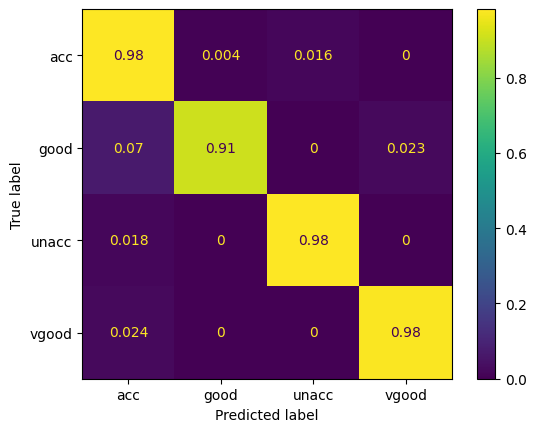

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_1, X_train, y_train, normalize='true')

**[6.9]** Print the accuracy and f1 scores of the validation set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y_val_preds = svc_1.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9350180505415162
0.9272801687510517


**[6.10]** Print the confusion matrix on the validation set

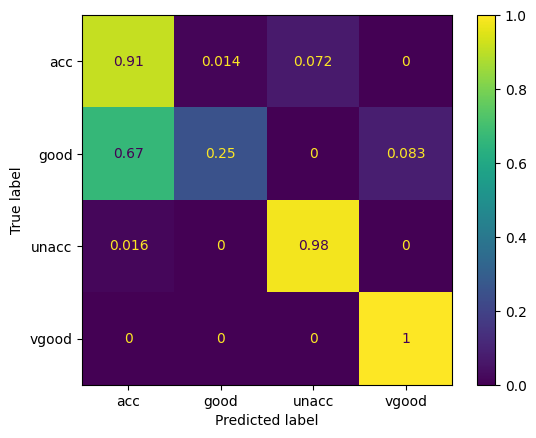

In [ ]:
ConfusionMatrixDisplay.from_estimator(svc_1, X_val, y_val, normalize='true')

## 7. Reduce SVC Overfitting with class weights

**[7.1]** Instantiate another SVC model by adding a weighting hyperparameter in order to balance each class 

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
svc_2 = SVC(class_weight='balanced')

**[7.2]** Train this model on the training set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
svc_2.fit(X_train, y_train)

SVC(class_weight='balanced')

**[7.3]** Save its predictions from the training and validation sets on 2 different variables

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y_train_preds = svc_2.predict(X_train)
y_val_preds = svc_2.predict(X_val)

**[7.4]** Display the accuracy score on the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9420814479638009
0.9205776173285198


**[7.5]** Display the f1 score on the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9439425348302004
0.9235486678925439


**[7.6]** Display the confusion matrices for this model on the training set

In [ ]:
# Placeholder for student's code

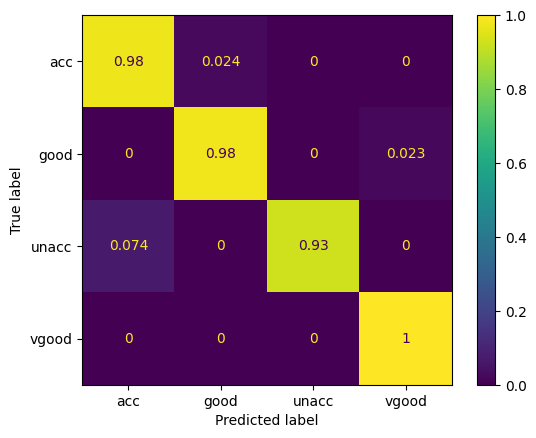

In [ ]:
# Solution: 
ConfusionMatrixDisplay.from_estimator(svc_2, X_train, y_train, normalize='true')

**[7.7]** Display the confusion matrices for this model on the validation set

In [ ]:
# Placeholder for student's code

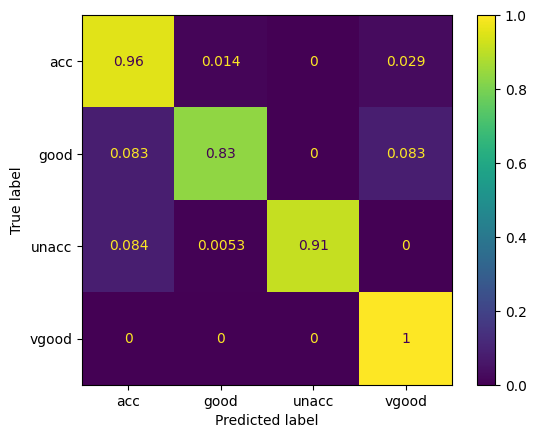

In [ ]:
# Solution: 
ConfusionMatrixDisplay.from_estimator(svc_2, X_val, y_val, normalize='true')

## 8. Reduce SVC Overfitting with C Hyperparameter

**[8.1]** Train a SVC model with C=0.5

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_c_1 = SVC(class_weight='balanced', C=0.5).fit(X_train, y_train)

**[8.2]** Save its predictions from the training and validation sets on 2 different variables

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y_train_preds = svc_c_1.predict(X_train)
y_val_preds = svc_c_1.predict(X_val)

**[8.3]** Display the accuracy score on the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9266968325791856
0.9169675090252708


**[8.4]** Display the f1 score on the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9298918594499036
0.9212286969772636


## 9. Reduce SVC Overfitting with C Hyperparameter

**[9.1]** Train a SVC model with a different value for C

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_c_2 = SVC(class_weight='balanced', C=1).fit(X_train, y_train)

**[9.2]** Save its predictions from the training and validation sets on 2 different variables

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y_train_preds = svc_c_2.predict(X_train)
y_val_preds = svc_c_2.predict(X_val)

**[9.3]** Display the accuracy score on the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9420814479638009
0.9205776173285198


**[9.4]** Display the f1 score on the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9439425348302004
0.9235486678925439


## 10. Reduce SVC Overfitting with C Hyperparameter

**[10.1]** Train a SVC model with a different value for C

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution
svc_c_3 = SVC(class_weight='balanced', C=0.45).fit(X_train, y_train)

**[10.2]** Save its predictions from the training and validation sets on 2 different variables

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y_train_preds = svc_c_3.predict(X_train)
y_val_preds = svc_c_3.predict(X_val)

**[10.3]** Display the accuracy score on the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(accuracy_score(y_train, y_train_preds))
print(accuracy_score(y_val, y_val_preds))

0.9248868778280543
0.9205776173285198


**[10.4]** Display the f1 score on the training and validation sets

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
print(f1_score(y_train, y_train_preds, average='weighted'))
print(f1_score(y_val, y_val_preds, average='weighted'))

0.9282002098443366
0.9246529469274023


**[10.5]** Plot the confusion matrics for the training set

In [ ]:
# Placeholder for student's code

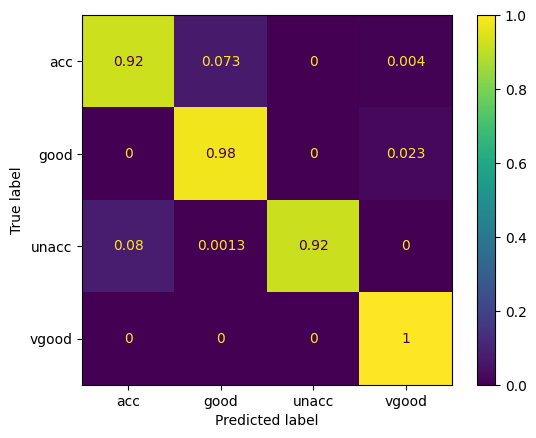

In [ ]:
# Solution
ConfusionMatrixDisplay.from_estimator(svc_c_3, X_train, y_train, normalize='true')

**[10.6]** Plot the confusion matrics for the validation set

In [ ]:
# Placeholder for student's code

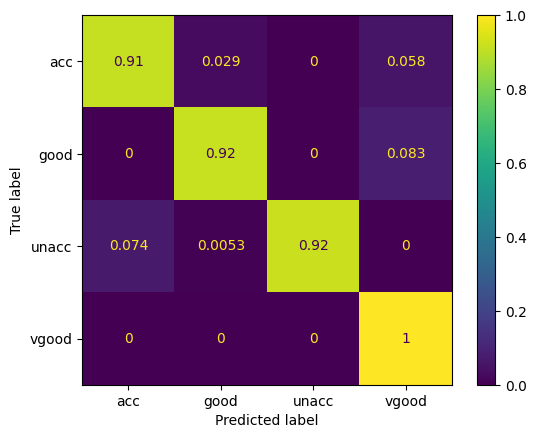

In [ ]:
# Solution: 
ConfusionMatrixDisplay.from_estimator(svc_c_3, X_val, y_val, normalize='true')

## 11.  Assess model on Testing Set

**[11.1]** Print the accuracy and f1 scores on the testing set

In [ ]:
# Placeholder for student's code

In [ ]:
# Solution: 
y_test_preds = svc_c_3.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))

0.9104046242774566
0.9148056748563718


**[11.2]** Plot the confusion matrics for the training and validation sets

In [ ]:
# Placeholder for student's code

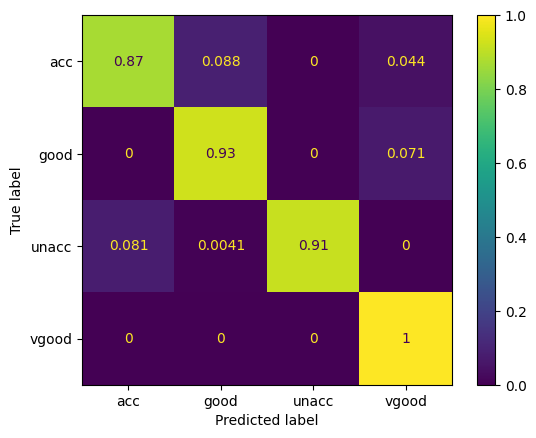

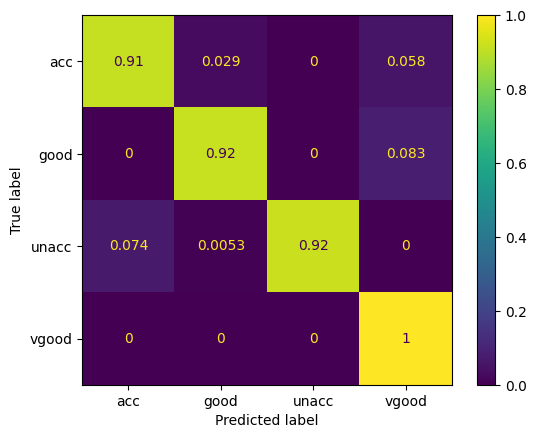

In [ ]:
# Solution: 
ConfusionMatrixDisplay.from_estimator(svc_c_3, X_test, y_test, normalize='true')
ConfusionMatrixDisplay.from_estimator(svc_c_3, X_val, y_val, normalize='true')